# 로지스틱 회귀 (Logistic Regression)

## 와인 데이터 살펴보기

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.keys())
print(wine.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:              

In [ ]:
import pandas as pd

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_class = pd.Series(wine.target, dtype='category')
wine_class = wine_class.cat.rename_categories(wine.target_names)
wine_df['Class'] = wine_class

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


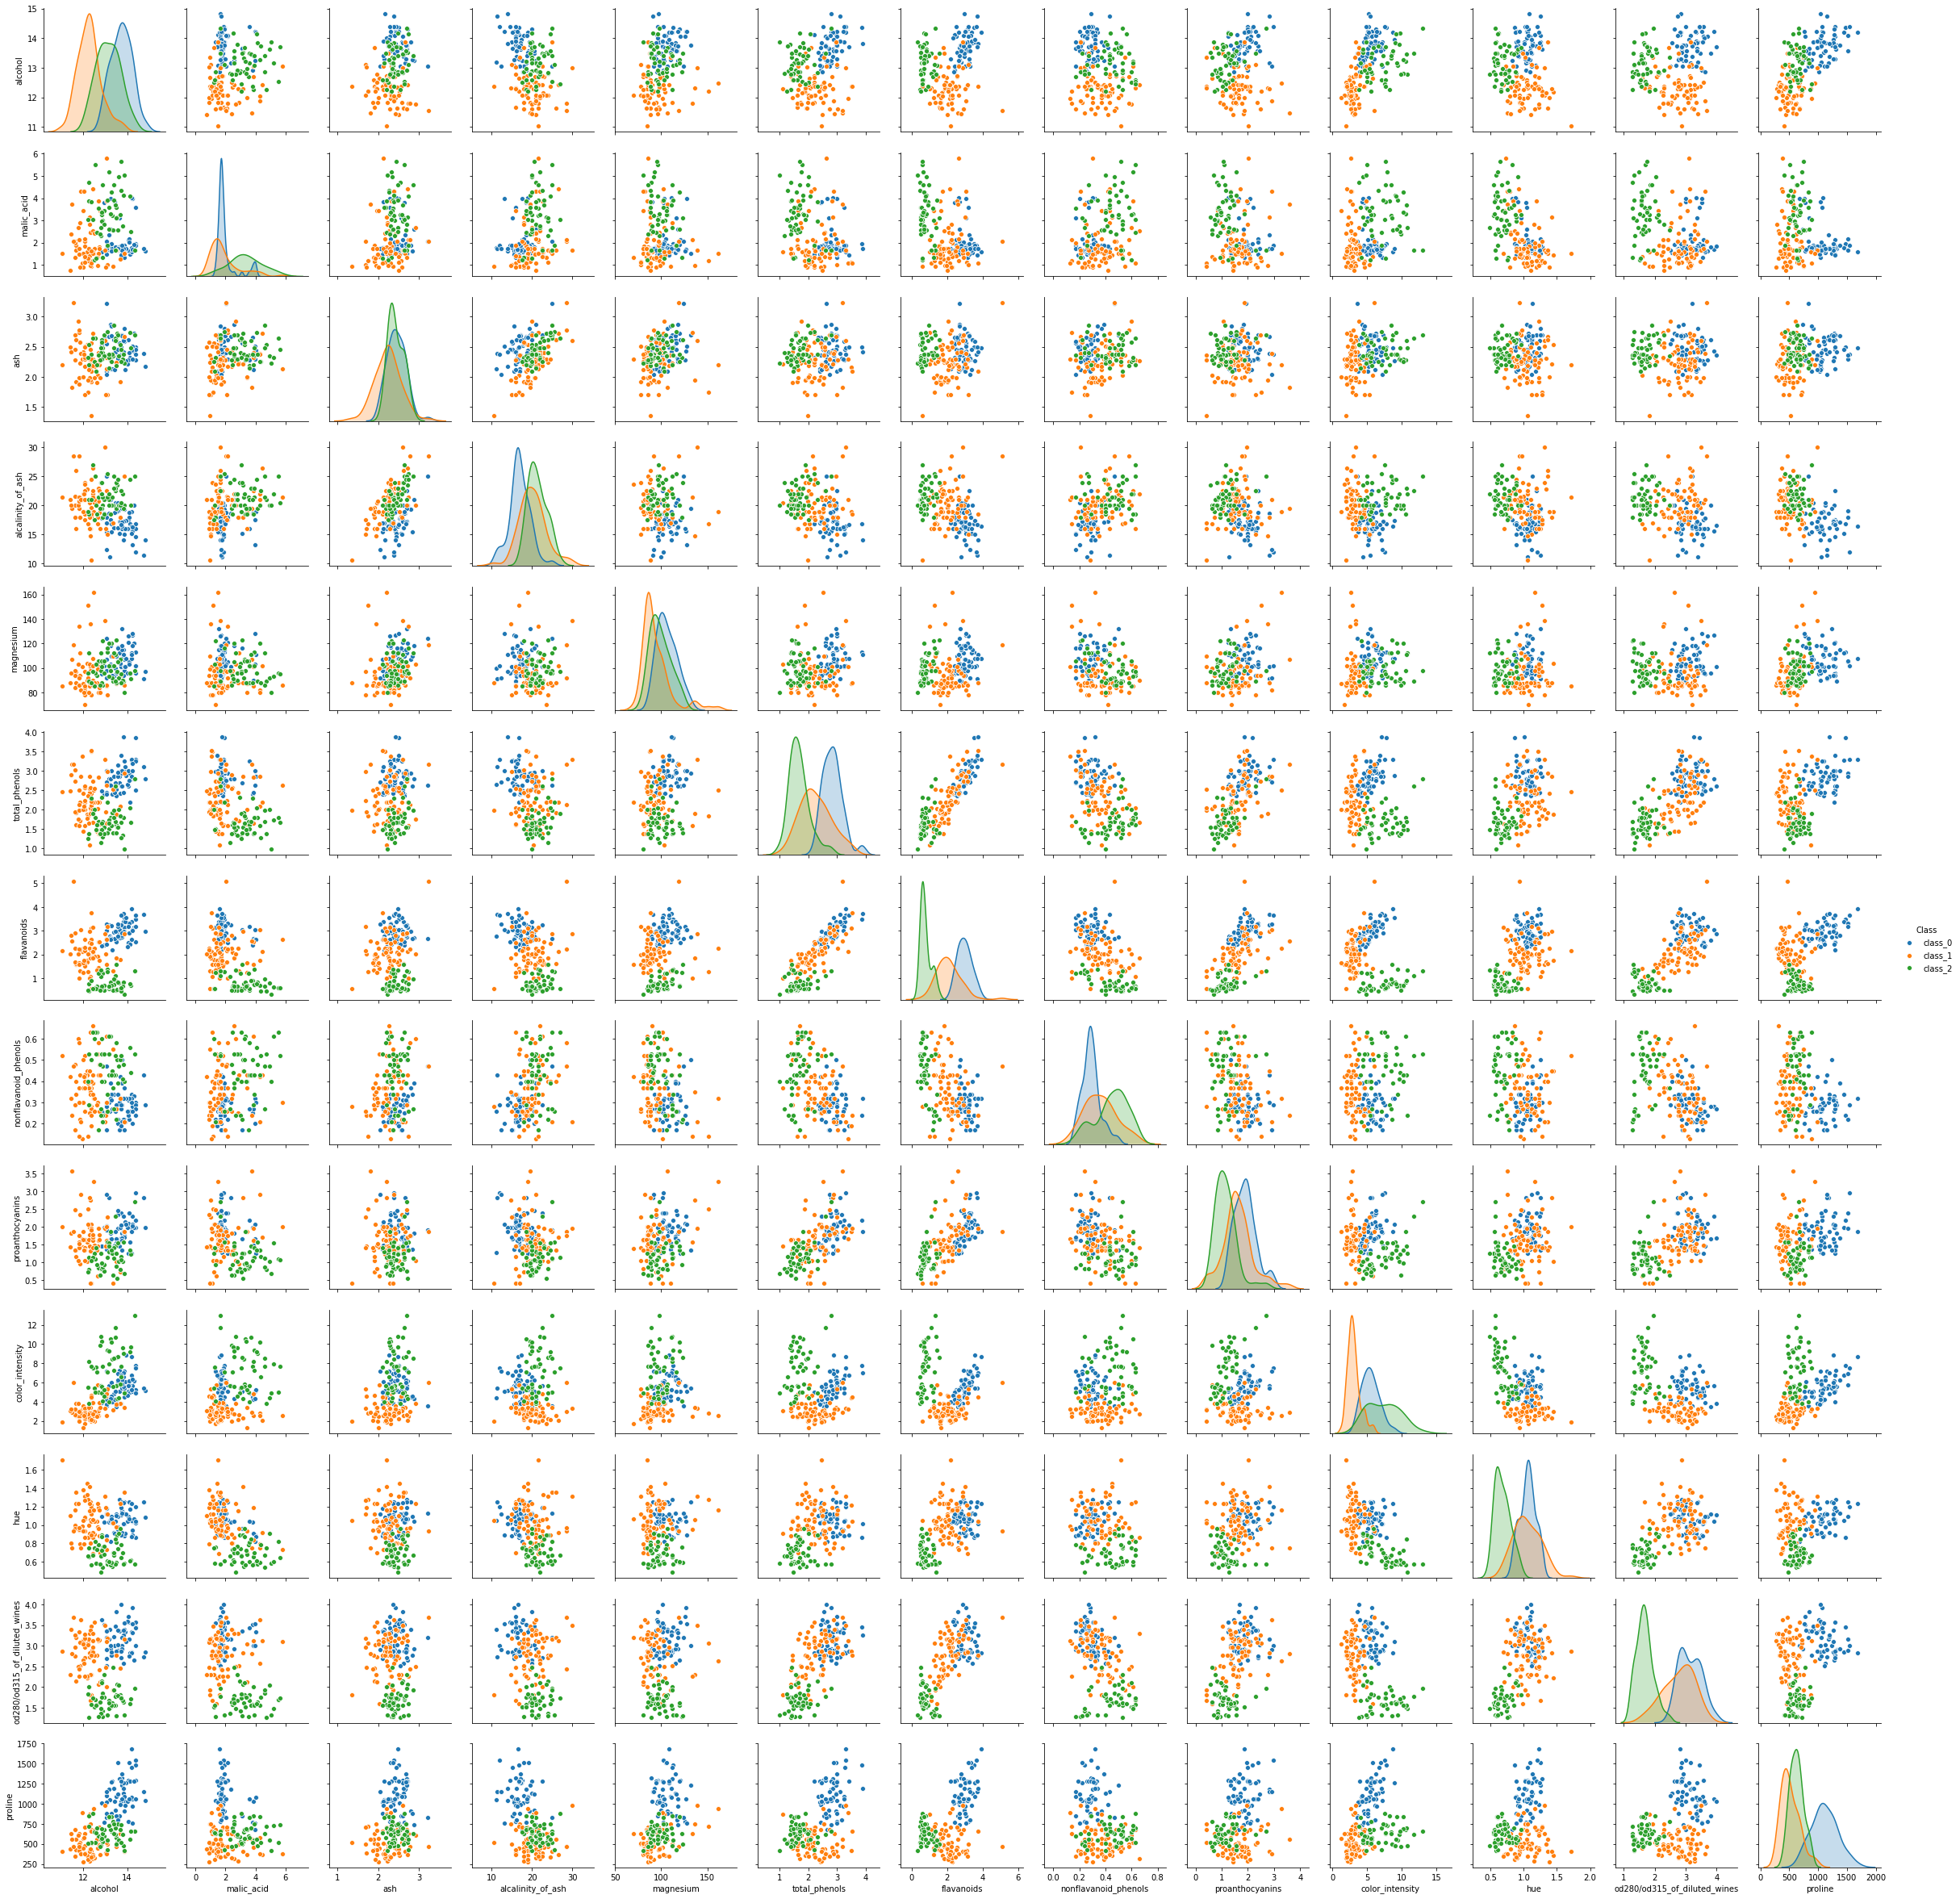

In [ ]:
import seaborn as sns

sns.pairplot(wine_df, hue='Class')

## 와인 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9647887323943662
평가 데이터 점수: 0.9722222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 최적의 파라미터 찾고 전처리(표준화)하여 모델 성능 높이기
### `GridSearchCV()`, `StandardScaler()`

In [ ]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l1', 'l2'],
               'C': [1.8, 2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'C': [1.8, 2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
result = gs.fit(wine.data, wine.target)

print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
최적 점수: 0.961111111111111
최적 파라미터: {'C': 2.0, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000103,0.000014,0.000000,0.000000,1.8,l1,"{'C': 1.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.049743,0.001378,0.000541,0.000039,1.8,l2,"{'C': 1.8, 'penalty': 'l2'}",0.833333,0.944444,0.888889,0.944444,0.888889,0.944444,1.0,1.0,1.0,1.0,0.944444,0.055556,6
2,0.000078,0.000012,0.000000,0.000000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,0.051899,0.008907,0.000534,0.000024,2,l2,"{'C': 2.0, 'penalty': 'l2'}",0.888889,0.944444,0.944444,0.944444,0.888889,1.000000,1.0,1.0,1.0,1.0,0.961111,0.043390,1
4,0.000073,0.000029,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.056010,0.011596,0.000542,0.000044,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",0.888889,0.944444,0.888889,0.944444,0.888889,1.000000,1.0,1.0,1.0,1.0,0.955556,0.048432,3
6,0.000079,0.000011,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.056792,0.008347,0.000543,0.000036,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",0.833333,0.944444,0.888889,0.944444,0.888889,1.000000,1.0,1.0,1.0,1.0,0.950000,0.058002,5
8,0.000071,0.000013,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.048608,0.001287,0.000548,0.000035,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",0.888889,0.944444,0.888889,0.944444,0.888889,1.000000,1.0,1.0,1.0,1.0,0.955556,0.048432,3


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LogisticRegression(C=2.0, penalty='l2'))
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9722222222222222


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, wine.data, wine.target, cv=5)

print("교차 검증 점수: {}".format(scores))
print("교차 검증 정확도: {} +/- {}".format(np.mean(scores), np.std(scores)))

교차 검증 점수: [0.97222222 0.97222222 1.         0.97142857 1.        ]
교차 검증 정확도: 0.9831746031746033 +/- 0.013740935306558193


# 확률적 경사 하강법 (Stochastic Gradient Descent)


## 와인 데이터에 대한 SGD 분류

In [ ]:
from sklearn.linear_model import SGDClassifier

model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0


In [ ]:
scores = cross_val_score(model, wine.data, wine.target, cv=5)

print("교차 검증 점수: {}".format(scores))
print("교차 검증 정확도: {} +/- {}".format(np.mean(scores), np.std(scores)))

교차 검증 점수: [0.97222222 0.97222222 1.         0.94285714 0.94285714]
교차 검증 정확도: 0.9660317460317461 +/- 0.021469097480714756
